In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import os
import getdist
from getdist import plots, MCSamples
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rc('legend',fontsize=14)

In [18]:
chain1 = pd.read_csv("../chains/DES_wlwl_Nzs_TAP_0.6/chain_1.csv")
chain2 = pd.read_csv("../chains/DES_wlwl_Nzs_TAP_0.6/chain_1.csv")
chain3 = pd.concat([chain1, chain2])
path = "../chains/DES_wlwl_Nzs_TAP_0.6/"
os.path.isfile(path+"chain_{}.csv".format(1))

True

In [19]:
def add_chains(path):
    chains = []
    i = 1 
    while os.path.isfile(path+"chain_{}.csv".format(i)):
        chain = pd.read_csv(path+"chain_{}.csv".format(i))
        chains.append(chain)
        i += 1
    return pd.concat(chains)

In [27]:
ND_gp = add_chains("../chains/ND_gp_hp_TAP_0.6/")
wlwl_test = add_chains("../chains/DES_wlwl_Nzs_test_TAP_0.6/")
wlwl_Nz10 = add_chains("../chains/DES_wlwl_Nzs_TAP_0.6/")

In [21]:
labels_dict = {'n': '\eta',
               'l': 'l',
               'h': 'h',
               'Ωm': '\Omega_m',
               'Ωb': '\Omega_b',
               'ns': 'n_s',
               's8': '\sigma_8',
               'A_IA': 'A_{IA}',
               'alpha_IA': r'\alpha_{IA}',
               'DESgc__0_0_dz': 'dz_{DESY1gc \, 0}',
               'DESgc__1_0_dz': 'dz_{DESY1gc \, 1}',
               'DESgc__2_0_dz': 'dz_{DESY1gc \, 2}',
               'DESgc__3_0_dz': 'dz_{DESY1gc \, 3}',
               'DESgc__4_0_dz': 'dz_{DESY1gc \, 4}',
               'DESgc__0_e_dz': 'dz_{DESY1wl \, 0}',
               'DESgc__1_e_dz': 'dz_{DESY1wl \, 1}',
               'DESgc__2_e_dz': 'dz_{DESY1wl \, 2}',
               'DESgc__3_e_dz': 'dz_{DESY1wl \, 3}',
               'DESgc__0_0_b': 'b_{DESY1 \, 0}',
               'DESgc__1_0_b': 'b_{DESY1 \, 1}',
               'DESgc__2_0_b': 'b_{DESY1 \, 2}',
               'DESgc__3_0_b': 'b_{DESY1 \, 3}',
               'DESgc__4_0_b': 'b_{DESY1 \, 4}',
               'DESwl__0_e_m': 'm_{DESY1 \, 0 }',
               'DESwl__1_e_m': 'm_{DESY1 \, 1 }',
               'DESwl__2_e_m': 'm_{DESY1 \, 2 }', 
               'DESwl__3_e_m': 'm_{DESY1 \, 3 }',
               'eBOSS__0_0_b': 'b_{eBOSS \, 0}',
               'eBOSS__1_0_b': 'b_{eBOSS \, 1}'}

In [22]:
def make_chain(file, label, ranges=dict({})):
    params = np.array(file.keys()[2:-12])
    names = []
    labels = []
    samples = []
    for param in params:
        if param in labels_dict.keys():
            names.append(param) 
            labels.append(labels_dict[param]) 
            samples.append(file[param])

    names = np.array(names)
    labels = np.array(labels)
    samples = np.transpose(np.array(samples))

    return MCSamples(samples=samples, names=names, labels=labels, label=label, ranges=ranges,
                    settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.4, 'smooth_scale_1D':0.3})
    

In [28]:
ND_gp_samples = make_chain(ND_gp, r"ND_{gp}")
wlwl_test_samples = make_chain(wlwl_test, r"$DESY1 WL$ test")
wlwl_Nz10_samples = make_chain(wlwl_Nz10, r"$DESY1 WL Nz 10$")

Removed no burn in
Removed no burn in
Removed no burn in


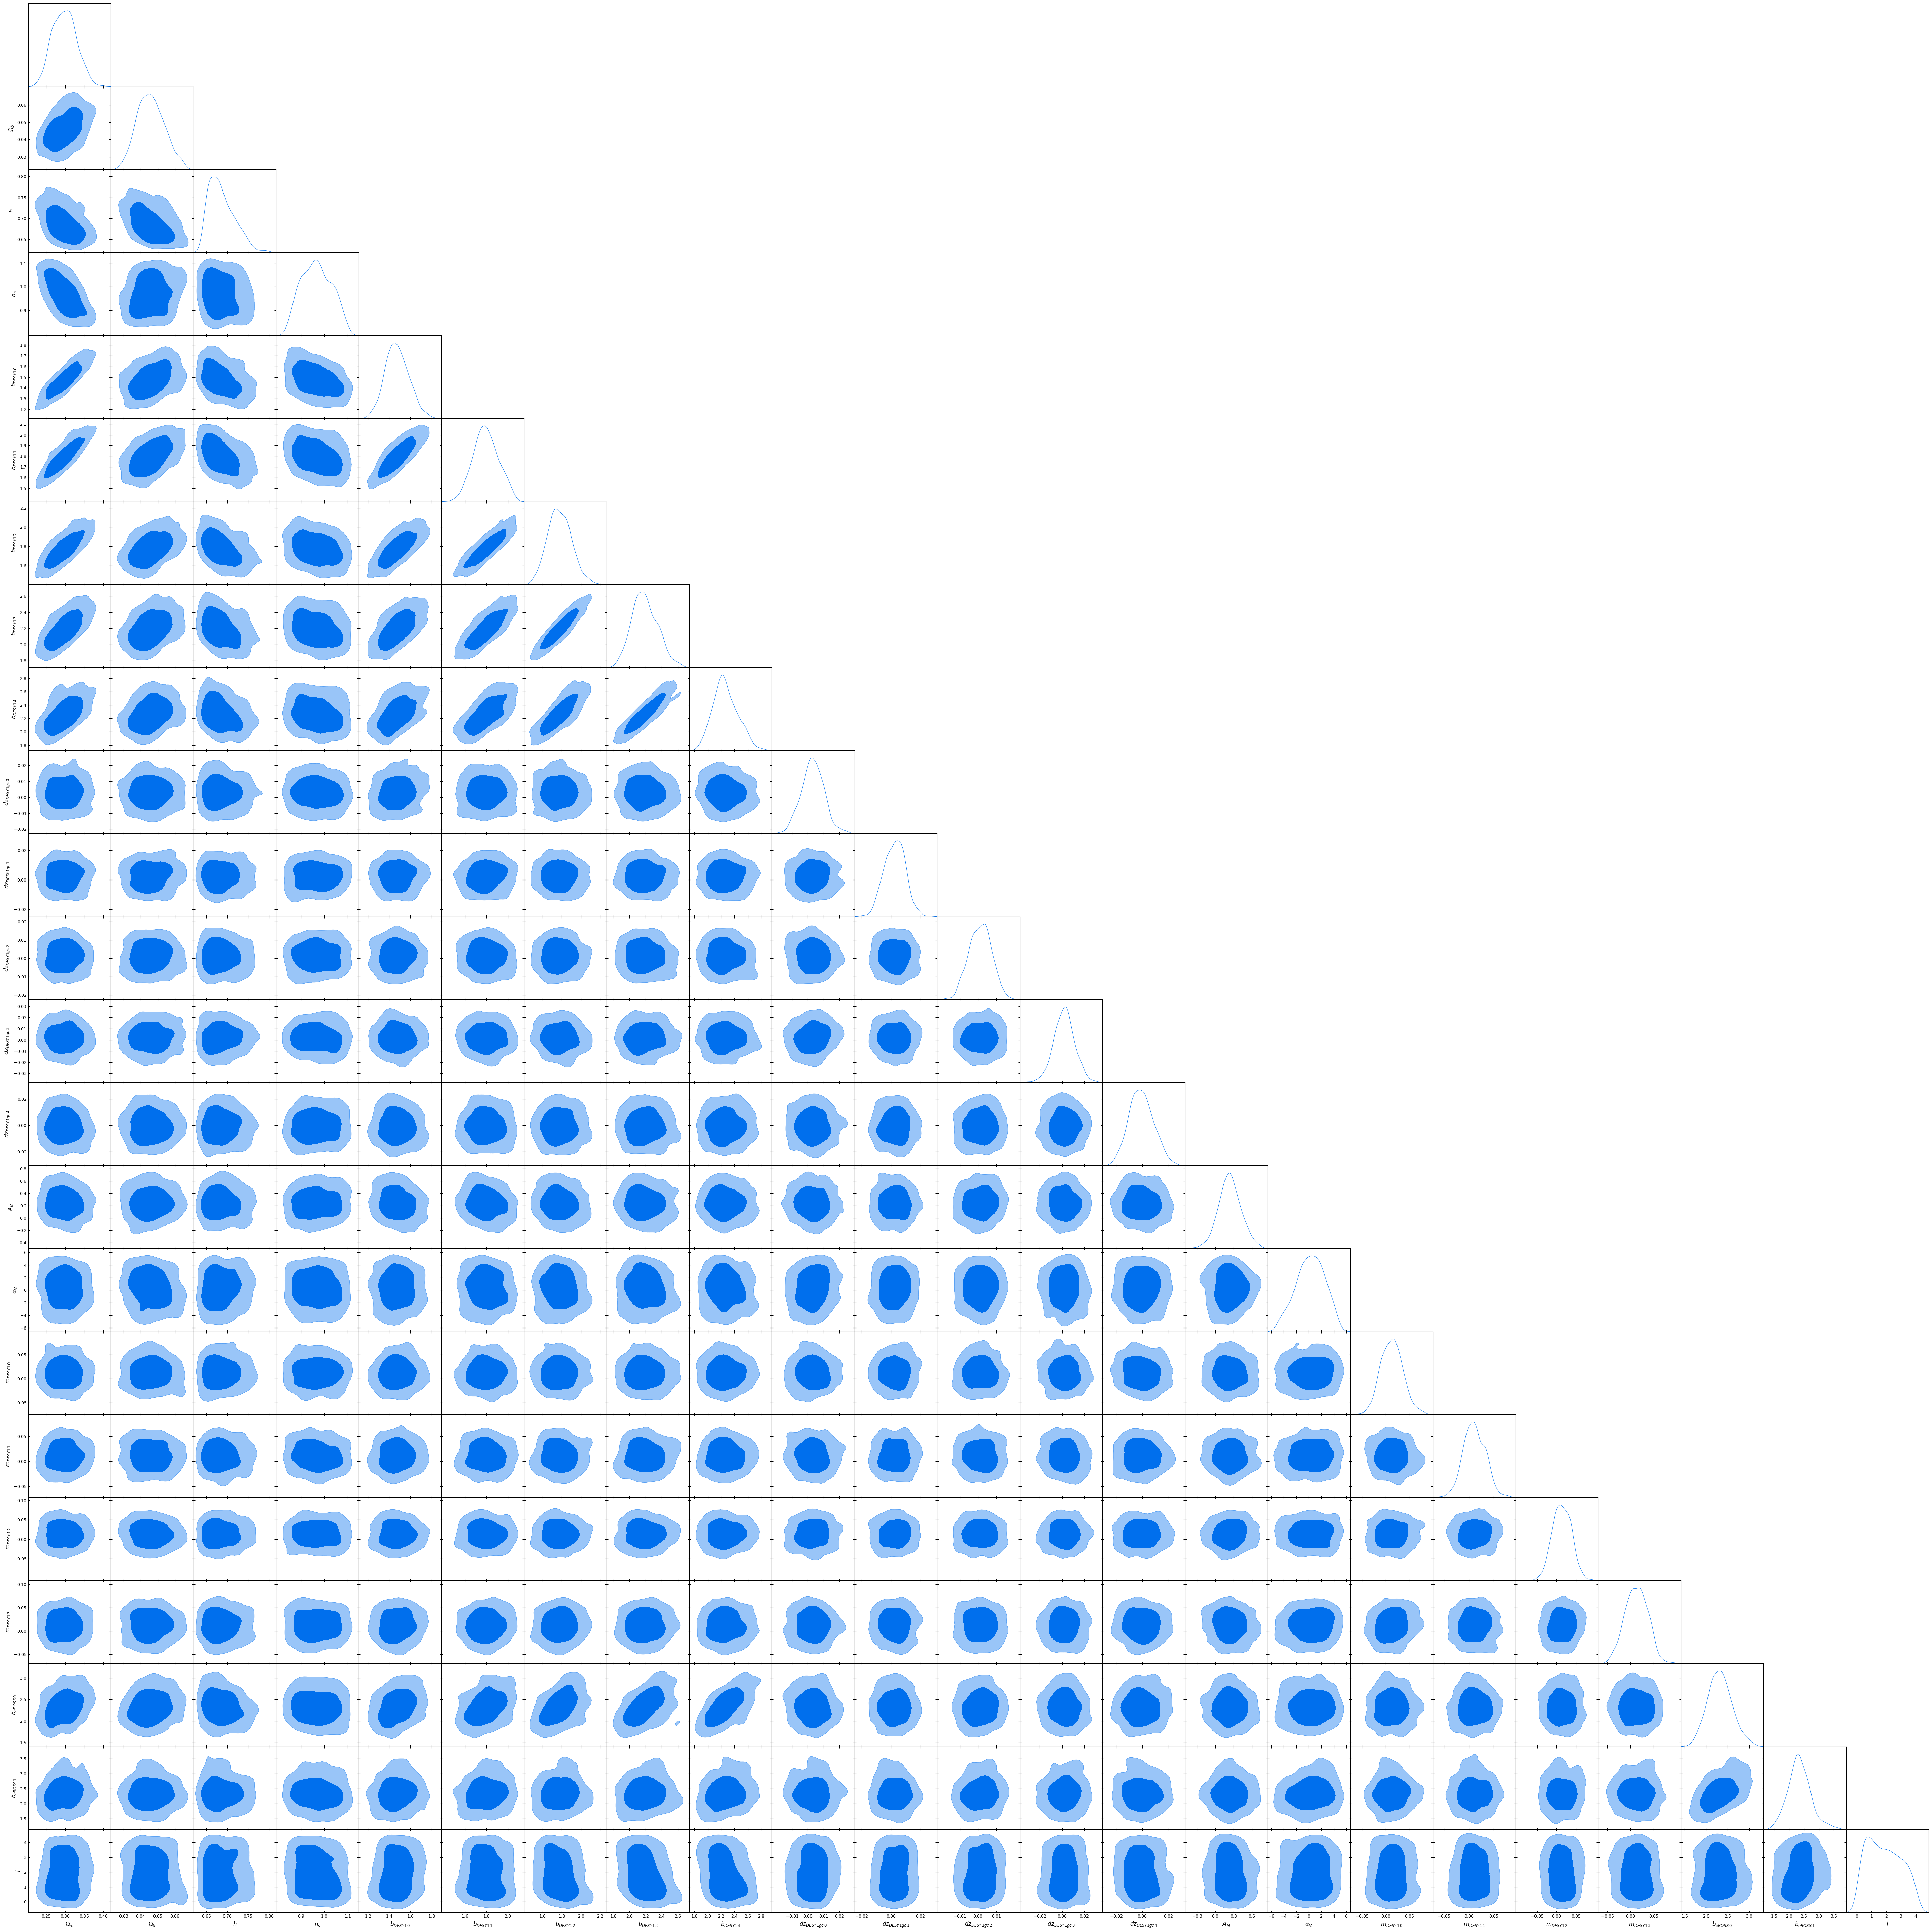

In [29]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot(ND_gp_samples, filled=True)

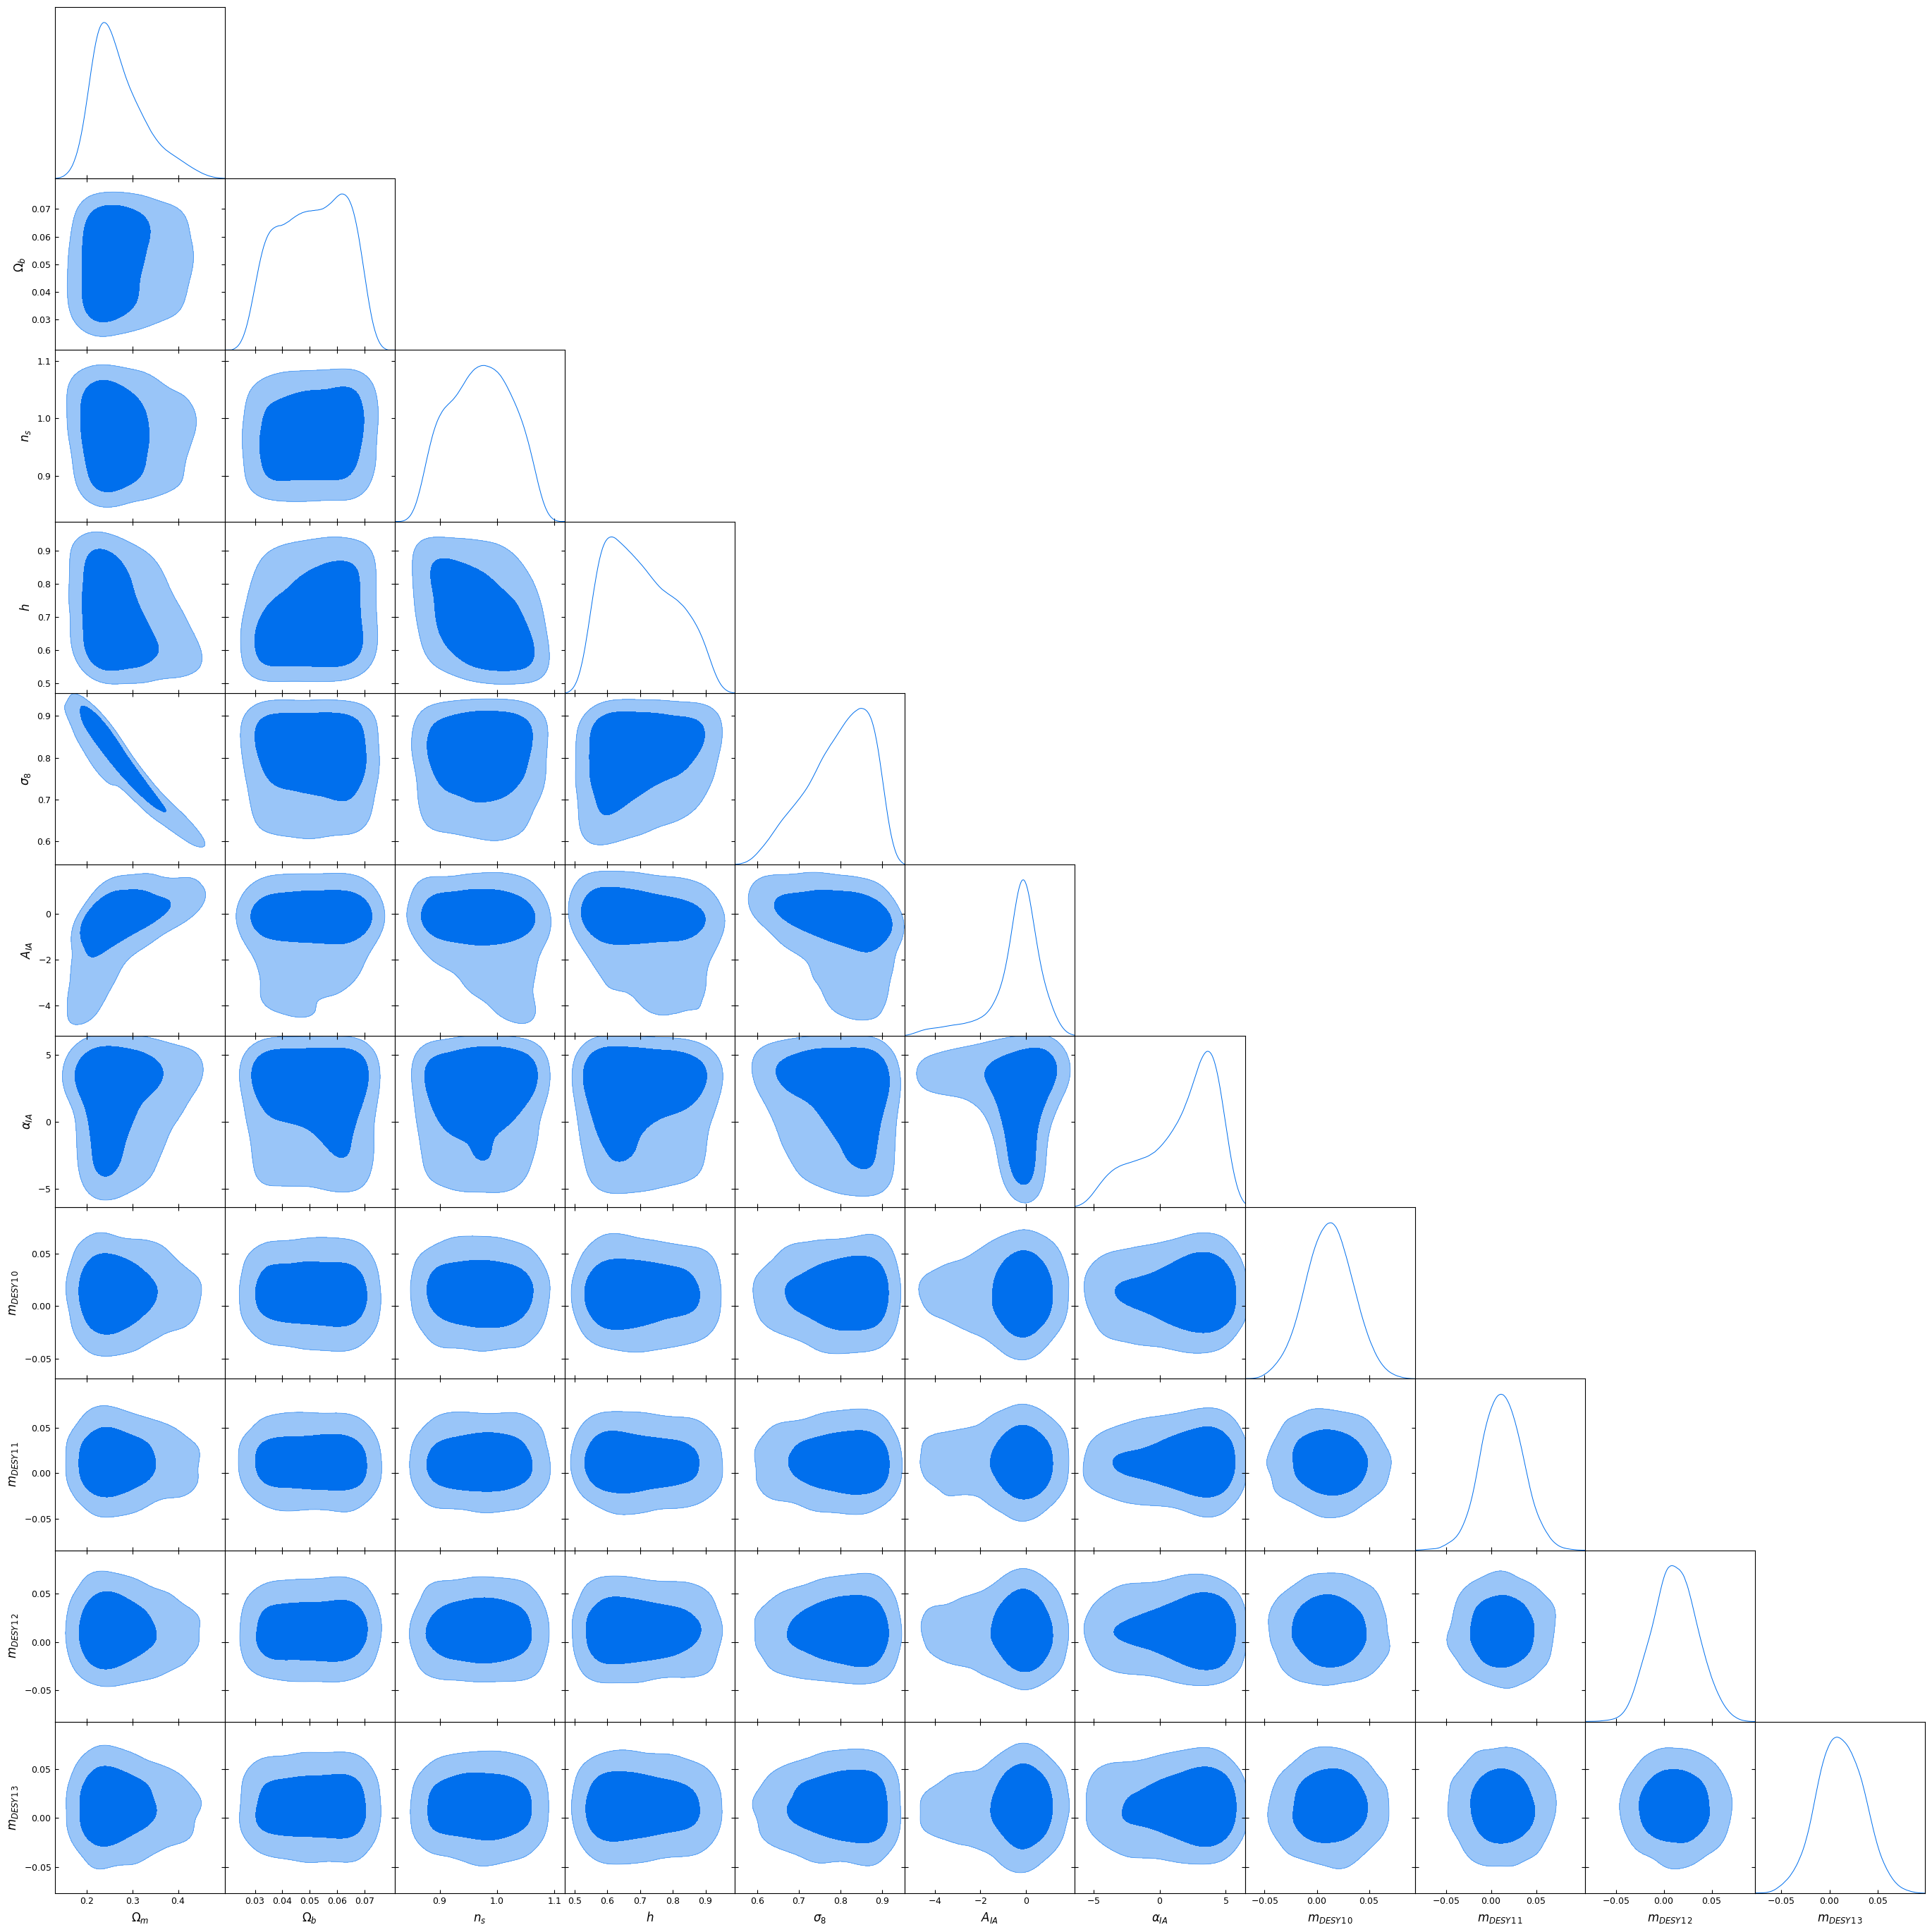

In [25]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot(wlwl_test_samples, ['Ωm', 'Ωb', 'ns', 'h', 's8',
                                    'A_IA', 'alpha_IA',
                                    'DESwl__0_e_m',  'DESwl__1_e_m', 'DESwl__2_e_m',  'DESwl__3_e_m'], filled=True)

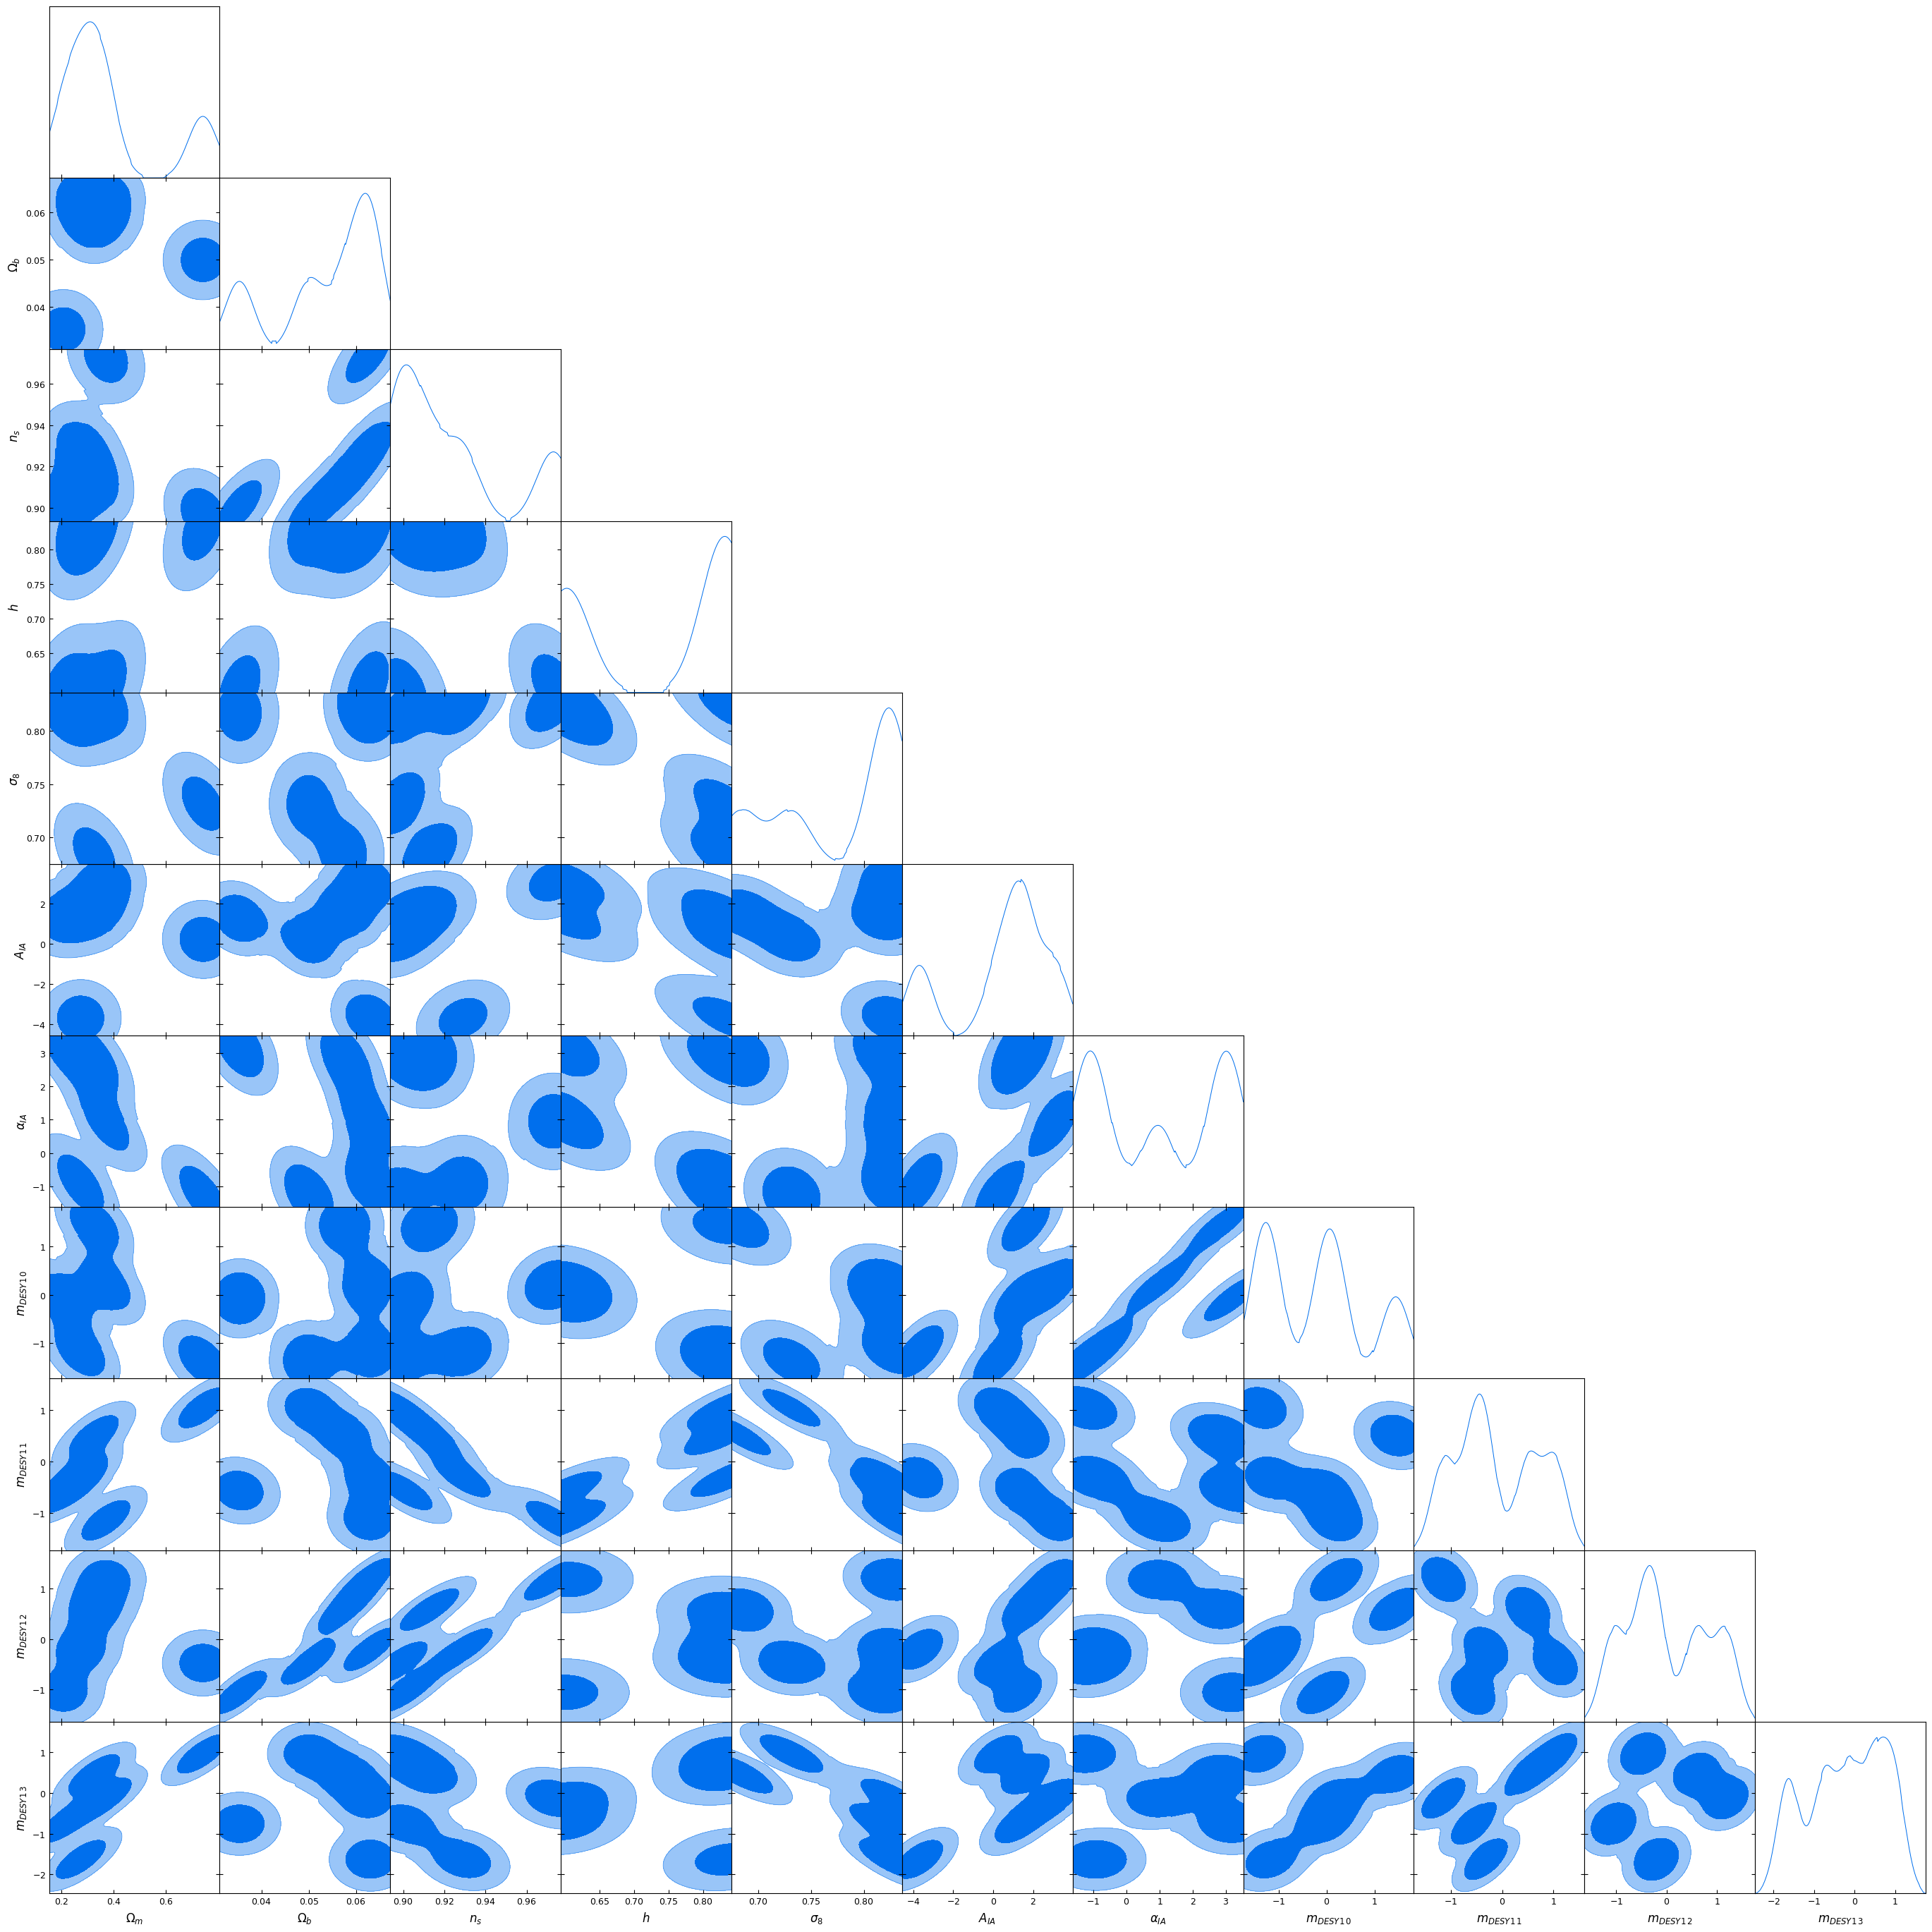

In [26]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot(wlwl_Nz10_samples, ['Ωm', 'Ωb', 'ns', 'h', 's8',
                                    'A_IA', 'alpha_IA',
                                    'DESwl__0_e_m',  'DESwl__1_e_m', 'DESwl__2_e_m',  'DESwl__3_e_m'], filled=True)

# GP's

In [56]:
import pyccl as ccl 

In [57]:
gp_z = np.linspace(0, 3, 11)
fid_cosmo = ccl.CosmologyVanillaLCDM()
LCDM_Dz = ccl.growth_factor(fid_cosmo, 1/(1+gp_z))

In [58]:
def add_gps(path):
    gps = []
    i = 1 
    while os.path.isfile(path+"gp_{}.npz".format(i)):
        gp = np.load(path+"gp_{}.npz".format(1))
        gps.append(gp)
        i += 1
    return np.concatenate(gps, 1)

In [59]:
gp_ND = add_gps("../chains/ND_gp_hp_TAP_0.6/")

In [60]:
def get_m_s(file):
    m = np.mean(file, 1)
    s = np.std(file, 1)
    p65 = np.percentile(file, 65, axis=1)
    p95 = np.percentile(file, 95, axis=1)
    s1 = p65-m
    s2 = p95-m
    return m, s, s1, s2

In [61]:
gp_ND_m, gp_ND_s, gp_ND_s1, gp_ND_s2 = get_m_s(gp_ND)

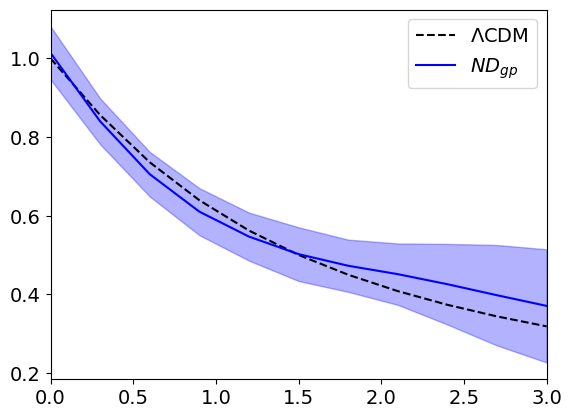

In [62]:
plt.plot(gp_z, LCDM_Dz, 'k--', label=r"$\Lambda$CDM")
plt.plot(gp_z, gp_ND_m, 'b-', label=r"$ND_{gp}$")
plt.fill_between(gp_z, gp_ND_m+gp_ND_s, gp_ND_m-gp_ND_s, color='b', alpha=.3)
plt.xlim(0, 3)
plt.legend()

# S8z

In [63]:
LCDM_S8 = 0.811 * LCDM_Dz/LCDM_Dz[0]

In [64]:
def make_S8(gps, chain):
    Ωms = np.array(chain["Ωm"])
    s8s = [0.811 * gp/gp[0] for gp in np.transpose(gps)]
    S8s = [s8s[i] * np.sqrt(Ωms[i]/0.3) for i in np.arange(len(s8s))]
    return np.transpose(S8s)

In [65]:
S8_ND = make_S8(gp_ND, ND_gp)

In [66]:
S8_ND_m, S8_ND_s, S8_ND_s1, S8_ND_s2 = get_m_s(S8_ND)

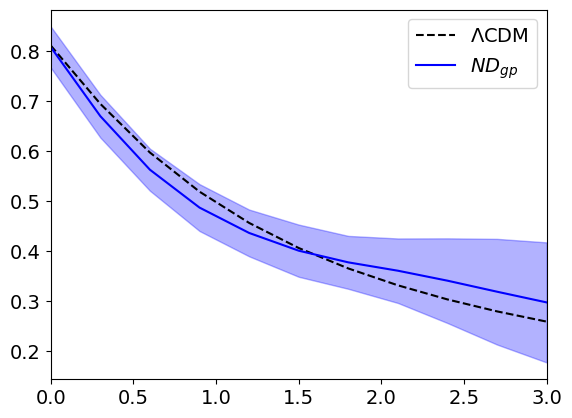

In [67]:
plt.plot(gp_z, LCDM_S8, 'k--', label=r"$\Lambda$CDM")
plt.plot(gp_z, S8_ND_m, 'b-', label=r"$ND_{gp}$")
plt.fill_between(gp_z, S8_ND_m+S8_ND_s, S8_ND_m-S8_ND_s, color='b', alpha=.3)
plt.xlim(0, 3)
plt.legend()